# ELEN 6885 Reinforcement Learning coding assignment

Your code should remain in the block marked by<br />
\############################<br />
\# YOUR CODE STARTS HERE<br />
\# YOUR CODE ENDS HERE<br />
\############################<br />
Please don't edit anything outside the block.

In [1]:
% load_ext autoreload
% autoreload 2
import numpy as np
import random
import matplotlib.pyplot as plt
import gym

## 1. Incremental Implementation of Average
We've finished the incremental implementation of average for you. Please call the function estimate with 1/step step size and fixed step size to compare the difference between this two on a simulated Bandit problem.<br />
<span style="color:red">(2 pts)</span>

In [2]:
from RLalgs.utils import estimate
random.seed(6885)
numTimeStep = 10000
q_h = np.zeros(numTimeStep + 1) # Q Value estimate with 1/step step size
q_f = np.zeros(numTimeStep + 1) # Q value estimate with fixed step size
FixedStepSize = 0.5 #A large number to exaggerate the difference
for step in range(1, numTimeStep + 1):
    if step < numTimeStep / 2:
        r = random.gauss(mu = 1, sigma = 0.1)
    else:
        r = random.gauss(mu = 3, sigma = 0.1)
    
    #TIPS: Call function estimate defined in ./RLalgs/utils.py
    ############################
    # YOUR CODE STARTS HERE
    q_h[step] = estimate(q_h[step-1],1/step,r)
    q_f[step] = estimate(q_f[step-1],FixedStepSize,r)
    # YOUR CODE ENDS HERE
    ############################
    
q_h = q_h[1:]
q_f = q_f[1:]

RLalgs is a package containing Reinforcement Learning algorithms Epsilon-Greedy, Policy Iteration, Value Iteration, Q-Learning, and SARSA.


Plot the two Q value estimates. (Please include a title, labels on both axes, and legends)<br />
<span style="color:red">(3 pts)</span>

Text(0.5,1,'Q value estimate - 1/step vs fixed step size')

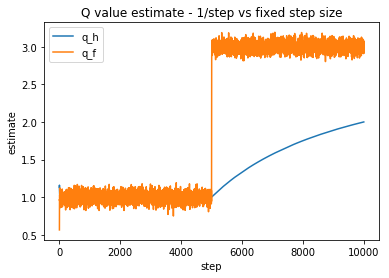

In [3]:
############################
# YOUR CODE STARTS HERE
plt.plot(q_h)
plt.plot(q_f)
plt.legend(['q_h','q_f'])
plt.ylabel('estimate')
plt.xlabel('step')
plt.title('Q value estimate - 1/step vs fixed step size')

# YOUR CODE ENDS HERE
############################

## 2. $\epsilon$-Greedy for Exploration
In Reinforcement Learning, we are always faced with the dilemma of exploration and exploitation. $\epsilon$-Greedy is a trade-off between them. You are gonna implement Greedy and $\epsilon$-Greedy. We combine these two policies in one function by treating Greedy as $\epsilon$-Greedy where $\epsilon = 0$. Edit the function epsilon_greedy in ./RLalgs/utils.py.<br />
<span style="color:red">(5 pts)</span>

In [4]:
from RLalgs.utils import epsilon_greedy
np.random.seed(6885) #Set the seed to cancel the randomness
q = np.random.normal(0, 1, size = 5)

############################
# YOUR CODE STARTS HERE
greedy_action = epsilon_greedy(q,0,6885) #Use epsilon = 0 for Greedy
e_greedy_action = epsilon_greedy(q,0.1,6885) #Use epsilon = 0.1
# YOUR CODE ENDS HERE
############################
print('Values:')
print(q)
print('Greedy Choice =', greedy_action)
print('Epsilon-Greedy Choice =', e_greedy_action)

Values:
[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968]
Greedy Choice = [0]
Epsilon-Greedy Choice = [0]


You should get the following results.<br />
Values:<br />
\[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968\]<br />
Greedy Choice = 0<br />

## 3. Frozen Lake Environment 

In [5]:
env = gym.make('FrozenLake-v0')

### 3.1 Derive Q value from V value
Edit function action_evaluation in ./RLalgs/utils.py.<br />
TIPS: $q(s, a)=\sum_{s',r}p(s',r|s,a)(r+\gamma v(s'))$<br />
<span style="color:red">(5 pts)</span>

In [6]:
from RLalgs.utils import action_evaluation
v = np.ones(16)
q = action_evaluation(env = env.env, gamma = 1, v = v)
print('Action values:')
print(q)

Action values:
[[1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.33333333 1.33333333 1.33333333]
 [1.         1.         1.         1.        ]]


You should get Q values all equal to one except at State 14

Pseudo-codes of the following four algorithms can be found on Page 80, 83, 130, 131 of the Sutton's book.

### 3.2 Model-based RL algorithms

In [7]:
from RLalgs.utils import action_evaluation, action_selection, render

### 3.2.1 Policy Iteration
Edit the function policy_iteration and relevant functions in ./RLalgs/pi.py to implement the Policy Iteration Algorithm.<br />
<span style="color:red">(15 pts)</span>

In [31]:
from RLalgs.pi import policy_iteration
V, policy, numIterations = policy_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)
print(policy)

State values:
[0.82352901 0.82352887 0.82352877 0.82352872 0.82352903 0.
 0.52941147 0.         0.82352909 0.82352917 0.76470567 0.
 0.         0.88235277 0.94117638 0.        ]
Number of iterations to converge = 3
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]


You should get values close to:<br />
State values:<br />
\[0.82352774 0.8235272  0.82352682 0.82352662 0.82352791 0.<br />
0.52941063 0.         0.82352817 0.82352851 0.76470509 0.<br />0.         0.88235232 0.94117615 0.\]

In [32]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
#Q = action_evaluation(env = env.env, gamma = 1, v = V)
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.2.2 Value Iteration
Edit the function value_iteration and relevant functions in ./RLalgs/vi.py to implement the Value Iteration Algorithm.<br />
<span style="color:red">(10 pts)</span>

In [33]:
from RLalgs.vi import value_iteration
V, policy, numIterations = value_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)
print(policy)

State values:
[0.82352901 0.82352887 0.82352877 0.82352872 0.82352904 0.
 0.52941147 0.         0.82352909 0.82352917 0.76470567 0.
 0.         0.88235277 0.94117638 0.        ]
Number of iterations to converge = 1
[0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]


You should get values close to:<br />
State values:<br />
\[0.82352773 0.82352718  0.8235268 0.8235266 0.8235279 0.<br />
0.52941062 0.         0.82352816 0.8235285 0.76470509 0.<br />0.         0.88235231 0.94117615 0.\]

In [ ]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
#Q = action_evaluation(env = env.env, gamma = 1, v = V)
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.3 Model free RL algorithms

### 3.3.1 Q-Learning
Edit the function QLearning in ./RLalgs/ql.py to implement the Q-Learning Algorithm.<br />
<span style="color:red">(10 pts)</span>

In [ ]:
from RLalgs.ql import QLearning
Q = QLearning(env = env.env, num_episodes = 10000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)


Generally, you should get non-zero action values on non-terminal states.

In [ ]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf 0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.3.2 SARSA
Edit the function SARSA in ./RLalgs/sarsa.py to implement the SARSA Algorithm.<br />
<span style="color:red">(10 pts)</span>

In [ ]:
from RLalgs.sarsa import SARSA
Q = SARSA(env = env.env, num_episodes = 9000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)


Generally, you should get non-zero action values on non-terminal states.

In [ ]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.4 Human
You can play this game if you are interested. See if you can get the frisbee either with or without the model.

In [ ]:
from RLalgs.utils import human_play
#Uncomment and run the following to play the game, comment it when you generate the pdf
#human_play(env)

# 4. Exploration VS. Exploitation
Try to reproduce Figure 2.2 (the upper one is enough) of the Sutton's book based on the experiment described in Chapter 2.3.<br />
<span style="color:red">Extra credit (3 pts)</span>

In [ ]:
# Do the experiment and record average reward acquired in each time step
############################
# YOUR CODE STARTS HERE
import numpy as np
from tqdm import tqdm




eps=[0,0.1,0.01] 



def epsilon_greedy(value, e):
    
        if random.random()<e : 
                action=np.random.randint(10)
        else : 
                action=np.argmax(value)

        return action


q_t=np.random.normal(0,1,(2000,10)) 

for e in range(len(eps)) : 
    reward_per_episode=[]
    q_values=np.zeros((2000,10)) 
    times_chosen=np.ones((2000,10))
     
    reward_per_episode.append(0)
    q_start=np.random.normal(q_t,1)
    reward_per_episode.append(np.mean(q_start))
    
    
    
    for j in tqdm(range(1,1000)) :  
        rewards=[]
        
        for i in range(2000) :
            a=epsilon_greedy(q_values[i],eps[e])
            reward=np.random.normal(q_t[i][a],1)
            rewards.append(reward)
            times_chosen[i][a]=times_chosen[i][a]+1
            q_values[i][a]=q_values[i][a]+(reward-q_values[i][a])/times_chosen[i][a]

        avg=np.mean(rewards)
        reward_per_episode.append(avg)
    plt.plot(reward_per_episode)
    plt.xlabel('steps')
    plt.ylabel('Average reward')
    plt.legend(['eps=0','eps=0.1','eps=0.01'])



# YOUR CODE ENDS HERE
############################

You should get curves similar to that in the book.